In [2]:
import numpy as np
import networkx as nx
import pandas as pd
from pandas import DataFrame
from tqdm import tqdm
from networkx.algorithms import average_shortest_path_length

In [3]:
def randic_index(G):
    #TODO: Finish documentation
    #TODO: Add randic algorithm to documentation
    
    """Compute the Randic index of the graph.

    Parameters
    ----------
    G : NetworkX graph

    Returns
    -------
    index: int
        

    Raises
    ------
    

    Examples
    --------
    >>> G = nx.erdos_renyi_graph(n=50, p=0.5)
    >>> print(nx.randic_index(G))
    25

    Notes
    -----
    ***Notes regarding bounds of Randic index go here***

    See Also
    --------
    
    """
    #TODO: add edge weights to graph? 
    #      Return graph with edges or just randic index?
    #      Is there a way to store the randic index in the graph?
    
    deg_dict = G.degree(G.nodes)
    index = np.sum([(1/np.sqrt(deg_dict[edge[0]]*deg_dict[edge[1]])) for edge in G.edges])
    
    return index

In [4]:
def simulate(prob_range: list, num_vert_range: list, num_sims: list) -> DataFrame:
    sample_dist = {}
    for i in tqdm(num_vert_range):
        graphs = {}    
        for j in prob_range:
            for k in range(num_sims):
                if k == 0:
                    graphs[j+1] = []
                    g = nx.erdos_renyi_graph(i,j)
                    graphs[j+1].append(g)
                else:
                    g = nx.erdos_renyi_graph(i,j)
                    graphs[j+1].append(g)
        
        sample_dist[i] = [np.mean([np.mean(randic_index(G)) for G in list(graphs.items())[idx][1]]) for idx,_ in enumerate(list(graphs.keys()))]
    
    return pd.DataFrame(sample_dist, index=prob_range) 

In [9]:
prob_range = [i/100 for i in range(0,101,5)]
num_vert_range = range(5,105,10)
num_sims = 1000
test = simulate(prob_range=prob_range, num_vert_range=num_vert_range, num_sims=num_sims)
test

100%|██████████| 10/10 [08:50<00:00, 53.02s/it]


,5,15,25,35,45,55,65,75,85,95
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.05,0.425342,3.657800,8.266083,13.508542,18.765674,24.056802,29.269379,34.470130,39.610758,44.700786
0.10,0.838941,5.444564,10.770004,16.017652,21.135351,26.222255,31.256963,36.282852,41.275953,46.300762
0.15,1.150893,6.306076,11.549245,16.672568,21.718427,26.734896,31.740925,36.754031,41.758040,46.759507
0.20,1.435700,6.710656,11.909924,16.940245,21.965750,26.969952,31.975849,36.975896,41.984082,46.984052
0.25,1.614072,6.993096,12.071973,17.087053,22.100721,27.107193,32.110025,37.113135,42.115449,47.113912
0.30,1.809492,7.134335,12.178132,17.183297,22.192819,27.193591,32.196661,37.197439,42.201675,47.200850
0.35,1.947062,7.222935,12.239502,17.249907,22.256909,27.256491,32.259668,37.259892,42.260928,47.260888
0.40,2.075314,7.281321,12.293572,17.297513,22.304129,27.307190,32.307120,37.307357,42.308579,47.308017
0.45,2.149469,7.324349,12.335006,17.337901,22.340109,27.341400,32.341796,37.343701,42.343905,47.344358


<AxesSubplot:>

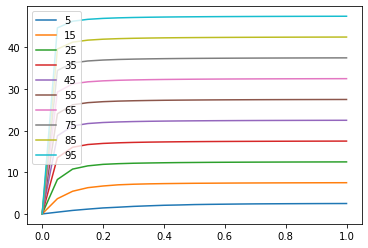

In [10]:
test.plot()

In [12]:
test.to_pickle('test.pkl')

In [ ]:
#TODO: try different classes of graphs.